<a href="https://colab.research.google.com/github/Akhay-Kumar/Machine-Learning-ML/blob/main/Linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear regression model**

In [ ]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [ ]:
final_coeff = list()

In [ ]:
def load_csv(filename):
    #TODO: create an empty list for storing the data from csv file
	dataset =[]
    #TODO: pass a filename into open() method and open a file in read mode
	with open(filename,'r') as file:
        #TODO: call a reader() method with file as argument 
		csv_reader = reader(file)
        #TODO: Iterate over the csv_reader
		for row in csv_reader:
			if not row:
				continue
                #TODO: append row into dataset
			dataset.append(row)
	return dataset

In [ ]:
def str_column_to_float(dataset, column):
    #TODO: Iterate over each row in the dataset
	for row in dataset:
        #TODO: convert the row[column] of dataset into float(). Use strip() method before converting 
        #to float. 
		row[column] = float(row[column].strip())


In [ ]:
def train_test_split(dataset, split):
	#TODO: create the empty list
	train = list()
    #TODO: calculate the train size based on splitting data with size of dataset
	train_size = split * len(dataset)
	dataset_copy = list(dataset)
	while len(train) < train_size:
		index = randrange(len(dataset_copy))
		train.append(dataset_copy.pop(index))
	return train, dataset_copy

In [ ]:
def rmse_metric(actual, predicted):
	#TODO: Initialize sum_error as 0.0
	sum_error = 0.0
	for i in range(len(actual)):
        #TODO: calculate the prediction_error as the difference between predicted_i and actual_i
		prediction_error = predicted[i]-actual[i]
        #TODO: calculate the sum_error as the sum of square of all prediction_error
		sum_error += (prediction_error**2)
    #TODO: calculate the mean_error as the division between sum_error by len of actual
	mean_error = sum_error/float(len(actual))
    #TODO: return the square root of mean_error
	return sqrt(mean_error)


In [ ]:
def evaluate_algorithm(dataset, algorithm, split, *args):
	#TODO: call the train_test_split() method for spliting dataset with split value
	train, test = train_test_split(dataset,split)
    #TODO: create an empty list
	test_set = list()
    #TODO: Iterate over each row of test
	for row in test:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(train, test_set, *args)
	actual = [row[-1] for row in test]
	rmse = rmse_metric(actual, predicted)
	#TODO: return the rmse
	return rmse


In [ ]:
def mean(values):
	#TODO: return the mean value of a list of numbers
    return sum(values)/float(len(values))

def covariance(x, mean_x, y, mean_y):
	#TODO: Initialize the covar as 0.0
	covar = 0.0
	for i in range(len(x)):
        #TODO: calculate the covar as the sum of product of (x_i-mean_x) and (y_i-mean_y)
		covar += (x[i]-mean_x)*(y[i]-mean_y)
	return covar


In [ ]:
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])

In [ ]:
def coefficients(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	#TODO: call the mean method for x and y
	x_mean, y_mean = mean(x), mean(y)
    #TODO: find the b1 by calling the covariance method divide by the variance method
	b1 = covariance(x,x_mean,y,y_mean)/variance(x,x_mean)
    #TODO calculate the b0 as y_mean - b1 * x_mean
	b0 = y_mean-b1*x_mean
    #TODO: append b0 in final_coeff list
	final_coeff.append(b0)
    #TODO: append b1 in final_coeff list
	final_coeff.append(b1)
	return [b0, b1]

In [ ]:
def simple_linear_regression(train, test):
	#TODO: create an empty list
	predictions = list()
    #TODO:call the coefficients method on training dataset
	b0, b1 = coefficients(train)
    #TODO: Iterate over each row of test
	for row in test:
        #TODO: calculate yhat as b0 + b1 * x
		yhat = b0+b1*row[0]
        #TODO: append the yhat value in predictions list
		predictions.append(yhat)
	return predictions


In [ ]:
seed(1)
# load and prepare data
filename = "/content/Insurance.csv"
#TODO: call the load_csv() to read filename
dataset = load_csv(filename)
for i in range(len(dataset[0])):
	str_column_to_float(dataset, i)
# evaluate algorithm
split = 0.6
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)
#TODO: print the RMSE value to 3 decimal places
print("%.3f" % rmse)


33.630


63


Text(0, 0.5, 'total payment for all the claims \n in thousands of Swedish Kronor')

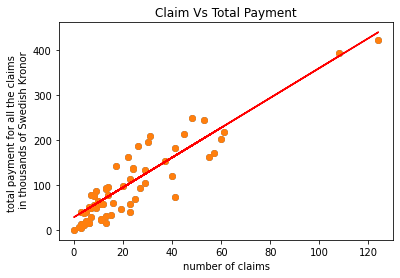

In [ ]:
from numpy import array
data = array(dataset)
final_pred=list()
for i in range(len(data)):
    final_pred.append(final_coeff[0]+final_coeff[1]*data[i,0])
    
print(len(final_pred))

import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,1])
plt.title('Claim Vs Total Payment')
plt.xlabel('number of claims')
plt.ylabel('total payment for all the claims \n in thousands of Swedish Kronor')

plt.scatter(data[:,0],data[:,1])
plt.plot(data[:,0],final_pred,color='red')
plt.title('Claim Vs Total Payment')
plt.xlabel('number of claims')
plt.ylabel('total payment for all the claims \n in thousands of Swedish Kronor')